In [1]:
%matplotlib inline
import numpy as  np   
import scipy as sp
import time
import math
from pylab import *
from scipy.integrate import quad 
from matplotlib import animation, rc
rc('animation', html='html5');
from tqdm import tqdm

In [20]:
def createGraph(n):
    if (n<1):
        return np.array([])
    return np.zeros((n, n))

def createPos(n, d):
    if (n<1 or d<1):
        return np.array([])
    return np.zeros((n, d))

def setVertex(A , i ,j):
    A[i, j] = 1
    A[j, i] = 1

def ringInit2D(A, pA):
    for i in range(N):
        p = N*np.exp(i * 2.*np.pi*1.j/N)
        pA[i, :] = [np.real(p), np.imag(p)]
        
def plotGraph(A, pA):
    # Plot vertices
    plot(pA[:, 0], pA[:, 1], 'ro')
    for i in range(N):
        annotate(str(i), xy=(pA[i, 0], pA[i, 1]), xytext=(pA[i, 0], pA[i, 1])) 
    axis('equal')
    
    # Plot edges
    for i in range(N):
        for j in arange(i + 1, N):
            if ( A[i, j] == 1 ):
                plot([ pA[i, 0], pA[j, 0] ], [ pA[i, 1], pA[j, 1] ], 'black')

                
def genRingGraphClose():
    A = createGraph(N)
    for i in range(N):
        setVertex(A, i, (i+1)%N)
    return A

def genRingGraphOpen():
    A = createGraph(N)
    for i in range(N-1):
        setVertex(A, i, i+1)
    return A
                
def genRandomGraph():
    A = createGraph(N)
    
    for i in range(N):
        # select one vertices and connect them
        for k in range(np.random.randint(7)):
            j = np.random.randint(0, N)
            setVertex(A, i, j)
    return A

def isConnected(A):
    if( dGM(A).max() < N):
        return True
    return False

def genRandomGraphConnected():
    A = genRandomGraph()
    
    while( not isConnected(A)):
        A = genRandomGraph()
    return A

def showDist(A, pA):
    for i in range(N):
        for j in arange(i, N):
            print("Distance ", i, "-", j, " :", dG(A, i, j), " _ ", np.linalg.norm(pA[i, :] - pA[j, :]))

In [3]:
def dG(A, i ,j):
    # La distance max sur un graph a N points est N-1
    # Donc si on parcours le graph N fois est que l'on arrive pas à un point donné dG=inf
    if ( i== j):
        return 0
    
    for k in arange(1, N + 1):
        if ( np.linalg.matrix_power(A,k)[i, j] > 0 ):
            return k
    return np.inf

def dGM(A):
    M = np.zeros((N, N))
    
    for i in range(N):
        for j in arange(i + 1, N):
            M[i, j] = dG(A, i, j)
            M[j, i] = M[i, j]
    return M

In [4]:
N = 5
D = 2

In [5]:
A = createGraph(N)
setVertex(A, 0, 4)
setVertex(A, 4, 3)
setVertex(A, 3, 2)
setVertex(A, 3, 1)

pA = createPos(N, D)
dA = dGM(A)

for i in range(N):
    for j in arange(i, N):
        print("Distance ", i, "-", j, " :", dG(A, i, j))

Distance  0 - 0  : 0
Distance  0 - 1  : 3
Distance  0 - 2  : 3
Distance  0 - 3  : 2
Distance  0 - 4  : 1
Distance  1 - 1  : 0
Distance  1 - 2  : 2
Distance  1 - 3  : 1
Distance  1 - 4  : 2
Distance  2 - 2  : 0
Distance  2 - 3  : 1
Distance  2 - 4  : 2
Distance  3 - 3  : 0
Distance  3 - 4  : 1
Distance  4 - 4  : 0


In [6]:
ringInit2D(A, pA)

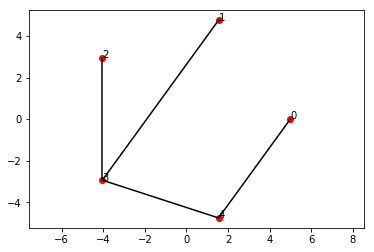

In [7]:
plotGraph(A, pA)

In [8]:
pA[1,:]

array([ 1.54508497,  4.75528258])

In [9]:
def S(pA, dA):
    s = 0.
    for i in range(N):
        for j in arange(i+1, N):
            s += (dA[i, j] - np.linalg.norm(pA[i, :] - pA[j, :]))**2
    return s
    

In [10]:
S(pA, dA)

378.74305637417365

In [11]:
def opti1(A, n, d, Nk):
    pA = createPos(n, d)
    dA = dGM(A)
    ringInit2D(A, pA)
    
    
    for k in tqdm(range(Nk)):
        val = S(pA, dA)
        i = np.random.randint(0, n)
        x = np.random.uniform(-1,1)
        y = np.random.uniform(-1,1)
        pA[i, :] += [x, y]
        
        if(val < S(pA, dA)):
            pA[i, :] -= [x, y]
    plotGraph(A, pA)
    return pA
    

100%|██████████| 5000/5000 [00:00<00:00, 8098.46it/s]


0.096489575772237574

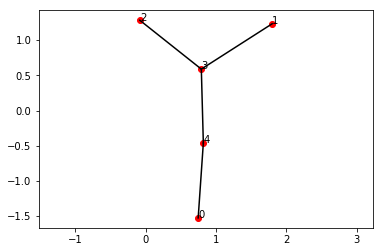

In [12]:
#N = 10
pA = opti1(A, N, D,5000)
S(pA, dA)

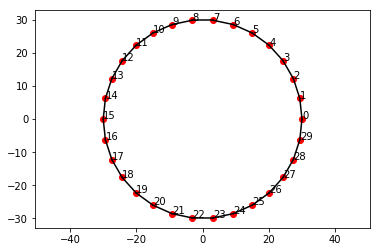

In [24]:
N = 30
#A = genRandomGraphConnected()
A = genRingGraphClose()
pA = createPos(N, D)
dA = dGM(A)
ringInit2D(A, pA)
plotGraph(A, pA)

100%|██████████| 50000/50000 [03:34<00:00, 233.46it/s]


502.69141933500703

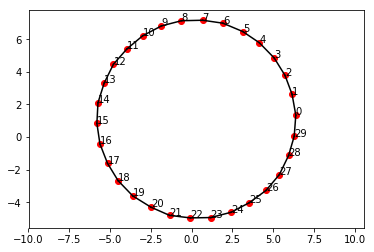

In [27]:
pA = opti1(A, N, D, 50000)
S(pA, dA)

In [ ]:
def dGB(A, dA):
    B = (I-)
    